In [39]:
import pandas as pd
from sarimax import SarimaxDengModel
from prophet_model import ProphetDengModel

In [40]:
def load_data(datapath: str = "../data/") -> pd.DataFrame:
    train_data = pd.read_csv(datapath + "dengue_features_train.csv")
    train_label = pd.read_csv(datapath + "dengue_labels_train.csv")
    dataset = train_data.merge(
        train_label, how="inner", on=["city", "year", "weekofyear"]
    )
    return dataset


def filter_city_data(data: pd.DataFrame, city_name: str) -> pd.DataFrame:
    return data[data.city == city_name]


data = load_data()
sj_data = filter_city_data(data, city_name="sj")
iq_data = filter_city_data(data, city_name="iq")

In [ ]:
# sj_prophet = ProphetDengModel(data = sj_data, city_name= 'sj', test_period=0)
# sj_prophet.train_models(get_model_summary=False,
#                         run_param_search=True)

In [ ]:
# sj_prophet.generate_submission_file()

In [ ]:
def load_test_data(datapath: str = "../data/") -> pd.DataFrame:
    test_data = pd.read_csv(datapath + "dengue_features_test.csv", parse_dates=[3])
    return test_data


test_data = load_test_data()
test_data = test_data.loc[test_data.city == "sj", :]
# test_data.loc[test_data.city=='sj', :].shape
future_dates = sj_prophet.model_fit.make_future_dataframe(260)
# future_dates.rename(columns = {'ds':'week_start_date'}, inplace = True)
# test_data = test_data.merge(future_dates, how = 'inner', left_on = 'week_start_date' ,
#                             right_on = 'ds')
test_data.fillna(0, inplace=True)
test_data.rename(columns={"week_start_date": "ds"}, inplace=True)

In [ ]:
# future_dates = sj_prophet.model_fit.make_future_dataframe(260)
pred_data = sj_prophet.model_fit.predict(test_data)
pred_data.shape

In [ ]:
test_data.shape

In [ ]:
pred_data.yhat

In [ ]:
pd.concat([sj_data, iq_data])

In [ ]:
SjModel = SarimaxDengModel(data=data, city_name="sj", test_period=0)
SjModel.train_models(run_param_search=True)
# SjModel.generate_submission_file()

In [ ]:
submission_file = SjModel.generate_submission_file()
submission_file

In [ ]:
# def load_test_data(datapath:str="../data/") -> pd.DataFrame:
#     test_data = pd.read_csv(datapath+"dengue_features_test.csv", parse_dates=[3])
#     return test_data
# test_data = load_test_data()
# EXOGENOUS_VARS = [
#     "ndvi_ne",
#     "ndvi_nw",
#     "ndvi_se",
#     "ndvi_sw",
#     "precipitation_amt_mm",
#     "reanalysis_air_temp_k",
#     "reanalysis_avg_temp_k",
#     "reanalysis_dew_point_temp_k",
#     "reanalysis_max_air_temp_k",
#     "reanalysis_min_air_temp_k",
#     "reanalysis_precip_amt_kg_per_m2",
#     "reanalysis_relative_humidity_percent",
#     "reanalysis_sat_precip_amt_mm",
#     "reanalysis_specific_humidity_g_per_kg",
#     "reanalysis_tdtr_k",
#     "station_avg_temp_c",
#     "station_diur_temp_rng_c",
#     "station_max_temp_c",
#     "station_min_temp_c",
#     "station_precip_mm",
# ]
# test_data = test_data.fillna(0)

# result = SjModel.model_fit.get_forecast(steps = len(test_data), exog= test_data[EXOGENOUS_VARS])

In [41]:
iq_data = filter_city_data(iq_data, city_name="iq")
IqModel = SarimaxDengModel(data=iq_data, city_name="iq", test_period=0)
IqModel.train_models(run_param_search=True)
# IqModel.generate_submission_file()

ADF Statistic: -6.085428681900052
p-value: 1.0672522948401876e-07
p-value less than 0.05, series likely stationary


  0%|          | 0/1 [00:00<?, ?it/s]

(0, 1, 0, 0, 0, 0)


/Users/linlincheng/.pyenv/versions/3.9.7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/linlincheng/.pyenv/versions/3.9.7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                    0            1
0  (0, 1, 0, 0, 0, 0)  3604.303692
        (p,d,q,P,D,Q)          AIC
0  (0, 1, 0, 0, 0, 0)  3604.303692
(0, 1, 0, 0, 0, 0)


/Users/linlincheng/.pyenv/versions/3.9.7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/linlincheng/.pyenv/versions/3.9.7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


520    2.699612
521    5.448726
522    3.531888
523    1.215200
524    5.842999
         ...   
671    4.750090
672    3.795446
673    3.061483
674    5.684845
675    3.146158
Name: predicted_mean, Length: 156, dtype: float64
(156, 25)
(156, 25)
   index city  year  weekofyear week_start_date   ndvi_ne   ndvi_nw   ndvi_se  \
0    260   iq  2010          26      2010-07-02  0.183783  0.142500  0.225129   
1    261   iq  2010          27      2010-07-09  0.291657  0.272267  0.330700   
2    262   iq  2010          28      2010-07-16  0.208543  0.366457  0.212629   
3    263   iq  2010          29      2010-07-23  0.089286  0.063214  0.122057   
4    264   iq  2010          30      2010-07-30  0.306100  0.327683  0.250086   

    ndvi_sw  precipitation_amt_mm  ...  reanalysis_precip_amt_kg_per_m2  \
0  0.150214                 82.29  ...                            34.11   
1  0.320914                 25.30  ...                             9.10   
2  0.255514                 62.14  ...    

/Users/linlincheng/.pyenv/versions/3.9.7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


,city,year,weekofyear,forecast
0,iq,2010,26,3
1,iq,2010,27,5
2,iq,2010,28,4
3,iq,2010,29,1
4,iq,2010,30,6
...,...,...,...,...
151,iq,2013,22,5
152,iq,2013,23,4
153,iq,2013,24,3
154,iq,2013,25,6


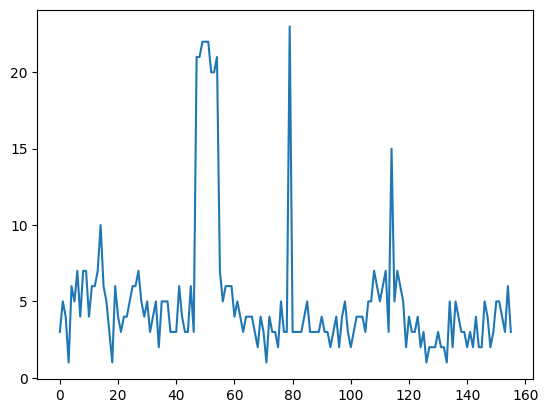

In [42]:
IqModel.generate_submission_file()